In [98]:
import pandas as pd

In [99]:
df_original=pd.read_csv("yellow_tripdata_2009-01.csv",nrows=250000)

In [100]:
df_original.head(5)

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70


In [101]:
df_original.describe()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
count,250000.000000,250000.000000,250000.000000,250000.000000,0.0,19.000000,250000.000000,250000.000000,250000.000000,250000.000000,0.0,250000.000000,250000.00000,250000.000000
mean,1.735888,2.569078,-72.883772,40.153827,NaN,0.052632,-72.905907,40.165181,9.517101,0.191130,NaN,0.465331,0.11507,10.292795
std,1.298154,2.967900,8.918261,4.968621,NaN,0.229416,8.823736,4.862155,7.246803,0.325777,NaN,1.284639,0.72664,8.216428
min,0.000000,0.000000,-83.432169,-0.018953,NaN,0.000000,-83.432169,-0.015837,2.500000,0.000000,NaN,0.000000,0.00000,2.500000
25%,1.000000,0.980000,-73.991448,40.736368,NaN,0.000000,-73.990983,40.735410,5.400000,0.000000,NaN,0.000000,0.00000,5.800000
50%,1.000000,1.620000,-73.981425,40.753933,NaN,0.000000,-73.979756,40.754154,7.300000,0.000000,NaN,0.000000,0.00000,7.900000
75%,2.000000,2.900000,-73.967492,40.768081,NaN,0.000000,-73.963958,40.769273,10.600000,0.500000,NaN,0.000000,0.00000,11.400000
max,6.000000,47.200000,0.007220,409.133332,NaN,1.000000,0.006728,81.535005,197.300000,1.000000,NaN,98.760000,20.00000,210.300000


In [102]:
#Drop Irrelevant columns from Analysis 
df_modified=df_original.drop(['Rate_Code','store_and_forward','surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
       'Total_Amt'],axis=1)


In [128]:
df_modified.head(5)

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,Hour,Weekday
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,-73.993803,40.695922,CASH,8.9,2,6
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,-73.955850,40.768030,Credit,12.1,3,6
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,-73.996558,40.731849,CREDIT,14.9,20,3
5,DDS,2009-01-16 22:35:59,2009-01-16 22:43:35,2,1.20,-73.989806,40.735006,-73.985021,40.724494,CASH,6.1,22,4
7,VTS,2009-01-04 04:31:00,2009-01-04 04:36:00,1,1.72,-73.992635,40.748362,-73.995585,40.728307,CASH,6.1,4,6


In [129]:
perc =[.01,.02, .10, .25, .50, .60, .80 , .90, .98] 

df_modified.describe(percentiles=perc)

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Fare_Amt,Hour,Weekday
count,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000
mean,1.724664,2.400940,-73.980358,40.752386,-73.978524,40.753024,9.139573,13.727315,3.202605
std,1.267633,1.514988,0.017822,0.019315,0.018727,0.022960,3.679955,6.545862,1.895379
min,1.000000,1.000000,-74.010415,40.695980,-74.011348,40.679812,2.500000,0.000000,0.000000
1%,1.000000,1.000000,-74.008773,40.708158,-74.009815,40.691529,4.900000,0.000000,0.000000
2%,1.000000,1.000000,-74.007898,40.714147,-74.008383,40.703254,4.900000,0.000000,0.000000
10%,1.000000,1.110000,-74.001722,40.725289,-74.001662,40.722657,5.700000,3.000000,0.000000
25%,1.000000,1.400000,-73.991820,40.738177,-73.991274,40.738016,6.500000,9.000000,2.000000
50%,1.000000,1.920000,-73.982345,40.753615,-73.980677,40.754597,8.100000,15.000000,3.000000
60%,1.000000,2.230000,-73.978782,40.758958,-73.976662,40.759865,8.900000,17.000000,4.000000


In [108]:
# There are Zero values for min  Passenger_Count & Trip_Distance. 
import numpy as np
df_modified=df_modified[(df_modified["Passenger_Count"]> 0) & (df_modified["Passenger_Count"]< 6)]
df_modified=df_modified[df_modified["Trip_Distance"] >= 1]
df_modified=df_modified[df_modified["Fare_Amt"]<=50]

df_modified=df_modified[(df_modified.Start_Lat <= np.percentile(df_modified.Start_Lat,98)) & (df_modified.Start_Lat >= np.percentile(df_modified.Start_Lat,2))]
df_modified=df_modified[(df_modified.Start_Lon <= np.percentile(df_modified.Start_Lon,98)) & (df_modified.Start_Lon >= np.percentile(df_modified.Start_Lon,2))]
df_modified=df_modified[(df_modified.End_Lat <= np.percentile(df_modified.End_Lat,98)) & (df_modified.End_Lat >= np.percentile(df_modified.End_Lat,2))]
df_modified=df_modified[(df_modified.End_Lon <= np.percentile(df_modified.End_Lon,98)) & (df_modified.End_Lon >= np.percentile(df_modified.End_Lon,2))]






In [110]:
df_modified.Start_Lon.quantile(0.01)

-74.008773

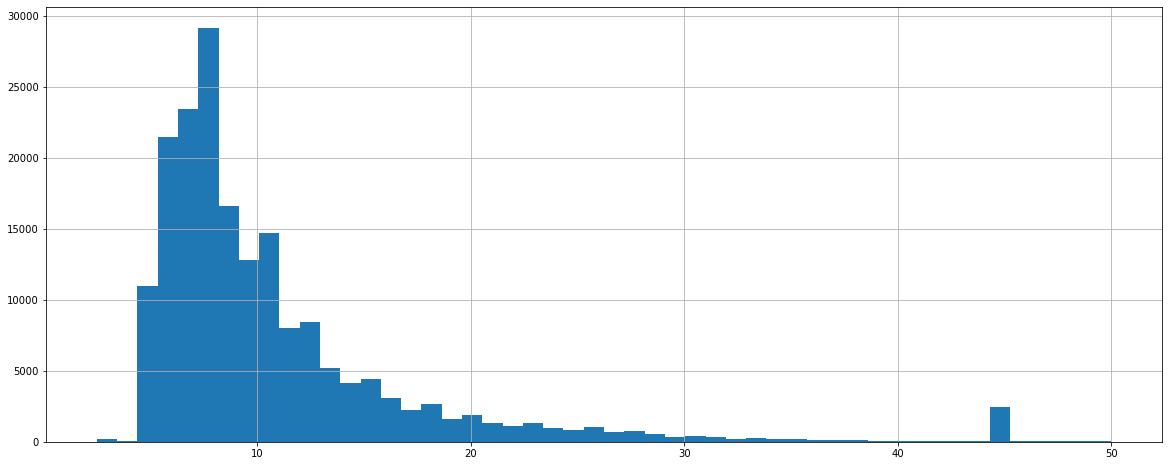

In [68]:
# plot histogram of fare
df_modified.Fare_Amt.hist(bins=50, figsize=(20,8))

In [111]:
min(df_modified.Start_Lon.min(), df_modified.End_Lon.min()), max(max(df_modified['Start_Lon']),max(df_modified['End_Lon']))

(-74.011348, -73.87444)

In [115]:
min(df_modified.Start_Lat.min(),df_modified.End_Lat.min()),max(df_modified.Start_Lat.max(),df_modified.End_Lat.max())

(40.679812, 40.808039)

In [125]:
df_modified['Hour']=pd.to_datetime(df_modified['Trip_Pickup_DateTime']).dt.hour
df_modified['Weekday']=pd.to_datetime(df_modified['Trip_Pickup_DateTime']).dt.weekday


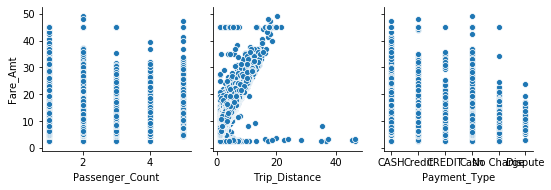

In [130]:

import seaborn as sns
#df_original.plot(x=['Passenger_Count','Trip_Distance'], y=['Fare_Amt'], kind = 'scatter')
#pp = sns.pairplot(data=df_original,y_vars=['Fare_Amt'],x_vars=['Passenger_Count','Trip_Distance','Trip_Pickup_DateTime','Payment_Type','store_and_forward','Start_Lat'])
pp = sns.pairplot(data=df_modified,y_vars=['Fare_Amt'],x_vars=['Passenger_Count','Trip_Distance','Payment_Type'])

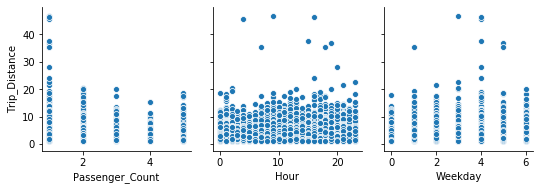

In [132]:
pp = sns.pairplot(data=df_modified,y_vars=['Trip_Distance'],x_vars=['Passenger_Count','Hour','Weekday'])

In [144]:
df_modified.head(5)


,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,Hour,Weekday
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,0.035824,-73.991957,40.721567,-73.993803,40.695922,CASH,8.9,0.086957,6
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,0.078022,-73.982102,40.736290,-73.955850,40.768030,Credit,12.1,0.130435,6
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,0.087912,-73.974267,40.790955,-73.996558,40.731849,CREDIT,14.9,0.869565,3
5,DDS,2009-01-16 22:35:59,2009-01-16 22:43:35,2,0.004396,-73.989806,40.735006,-73.985021,40.724494,CASH,6.1,0.956522,4
7,VTS,2009-01-04 04:31:00,2009-01-04 04:36:00,1,0.015824,-73.992635,40.748362,-73.995585,40.728307,CASH,6.1,0.173913,6


In [145]:
perc =[.01,.02, .10, .25, .50, .60, .80 , .90, .98] 

df_modified.describe(percentiles=perc)

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Fare_Amt,Hour,Weekday
count,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000,150914.000000
mean,1.724664,0.030790,-73.980358,40.752386,-73.978524,40.753024,9.139573,0.596840,3.202605
std,1.267633,0.033296,0.017822,0.019315,0.018727,0.022960,3.679955,0.284603,1.895379
min,1.000000,0.000000,-74.010415,40.695980,-74.011348,40.679812,2.500000,0.000000,0.000000
1%,1.000000,0.000000,-74.008773,40.708158,-74.009815,40.691529,4.900000,0.000000,0.000000
2%,1.000000,0.000000,-74.007898,40.714147,-74.008383,40.703254,4.900000,0.000000,0.000000
10%,1.000000,0.002418,-74.001722,40.725289,-74.001662,40.722657,5.700000,0.130435,0.000000
25%,1.000000,0.008791,-73.991820,40.738177,-73.991274,40.738016,6.500000,0.391304,2.000000
50%,1.000000,0.020220,-73.982345,40.753615,-73.980677,40.754597,8.100000,0.652174,3.000000
60%,1.000000,0.027033,-73.978782,40.758958,-73.976662,40.759865,8.900000,0.739130,4.000000
